In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
#distribution of outcomr varibles
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

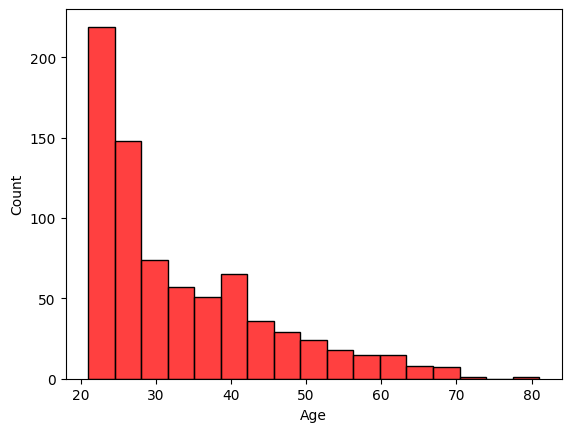

In [ ]:
sns.histplot(data=df,x='Age',color='red')

In [ ]:
import warnings
fig,ax=plt.subplots(4,2,figsize=(20,20))
sns.distplot(df.Pregnancies,bins=20,ax=ax[0,0],color='green')
sns.distplot(df.Glucose	,bins=20,ax=ax[1,0],color='green')
sns.distplot(df.BloodPressure,bins=20,ax=ax[1,1],color='green')
sns.distplot(df.SkinThickness,bins=20,ax=ax[2,0],color='green')
sns.distplot(df.Insulin,bins=20,ax=ax[2,1],color='green')
sns.distplot(df.DiabetesPedigreeFunction,bins=20,ax=ax[3,0],color='green')
sns.distplot(df.Age,bins=20,ax=ax[3,1],color='green')


<ipython-input-11-4d8807aafefd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies,bins=20,ax=ax[0,0],color='green')
<ipython-input-11-4d8807aafefd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Glucose	,bins=20,ax=ax[1,0],color='green')
<ipython-input-11-4d8807aafefd>:5: User

<Axes: xlabel='Age', ylabel='Density'>

In [ ]:
grouped_data = df.groupby("Outcome")["Glucose"].mean().reset_index()
grouped_data

Outcome     Glucose
0        0  109.980000
1        1  141.257463

<ipython-input-14-4e3772eebc5f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Outcome", y="Glucose", data=grouped_data, palette="viridis")


<Axes: xlabel='Outcome', ylabel='Glucose'>

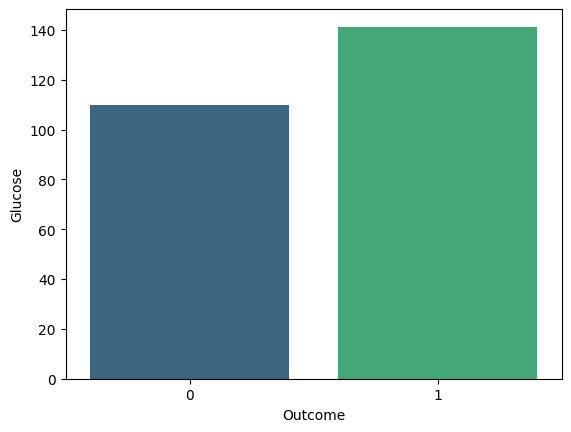

In [ ]:
sns.barplot(x="Outcome", y="Glucose", data=grouped_data, palette="viridis")


In [ ]:
grouped_data_age = df.groupby("Outcome")["Age"].mean().reset_index()


In [ ]:
grouped_data_age

Outcome        Age
0        0  31.190000
1        1  37.067164

<ipython-input-17-963aaeb9fa5e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Outcome", y="Age", data=grouped_data_age, palette="viridis")


<Axes: xlabel='Outcome', ylabel='Age'>

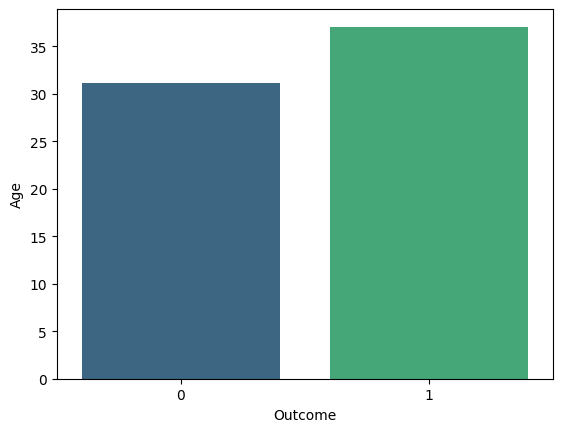

In [ ]:
sns.barplot(x="Outcome", y="Age", data=grouped_data_age, palette="viridis")


In [ ]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Map')
plt.show()

# Data Preprocessing

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age']]=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.nan)

<Axes: >

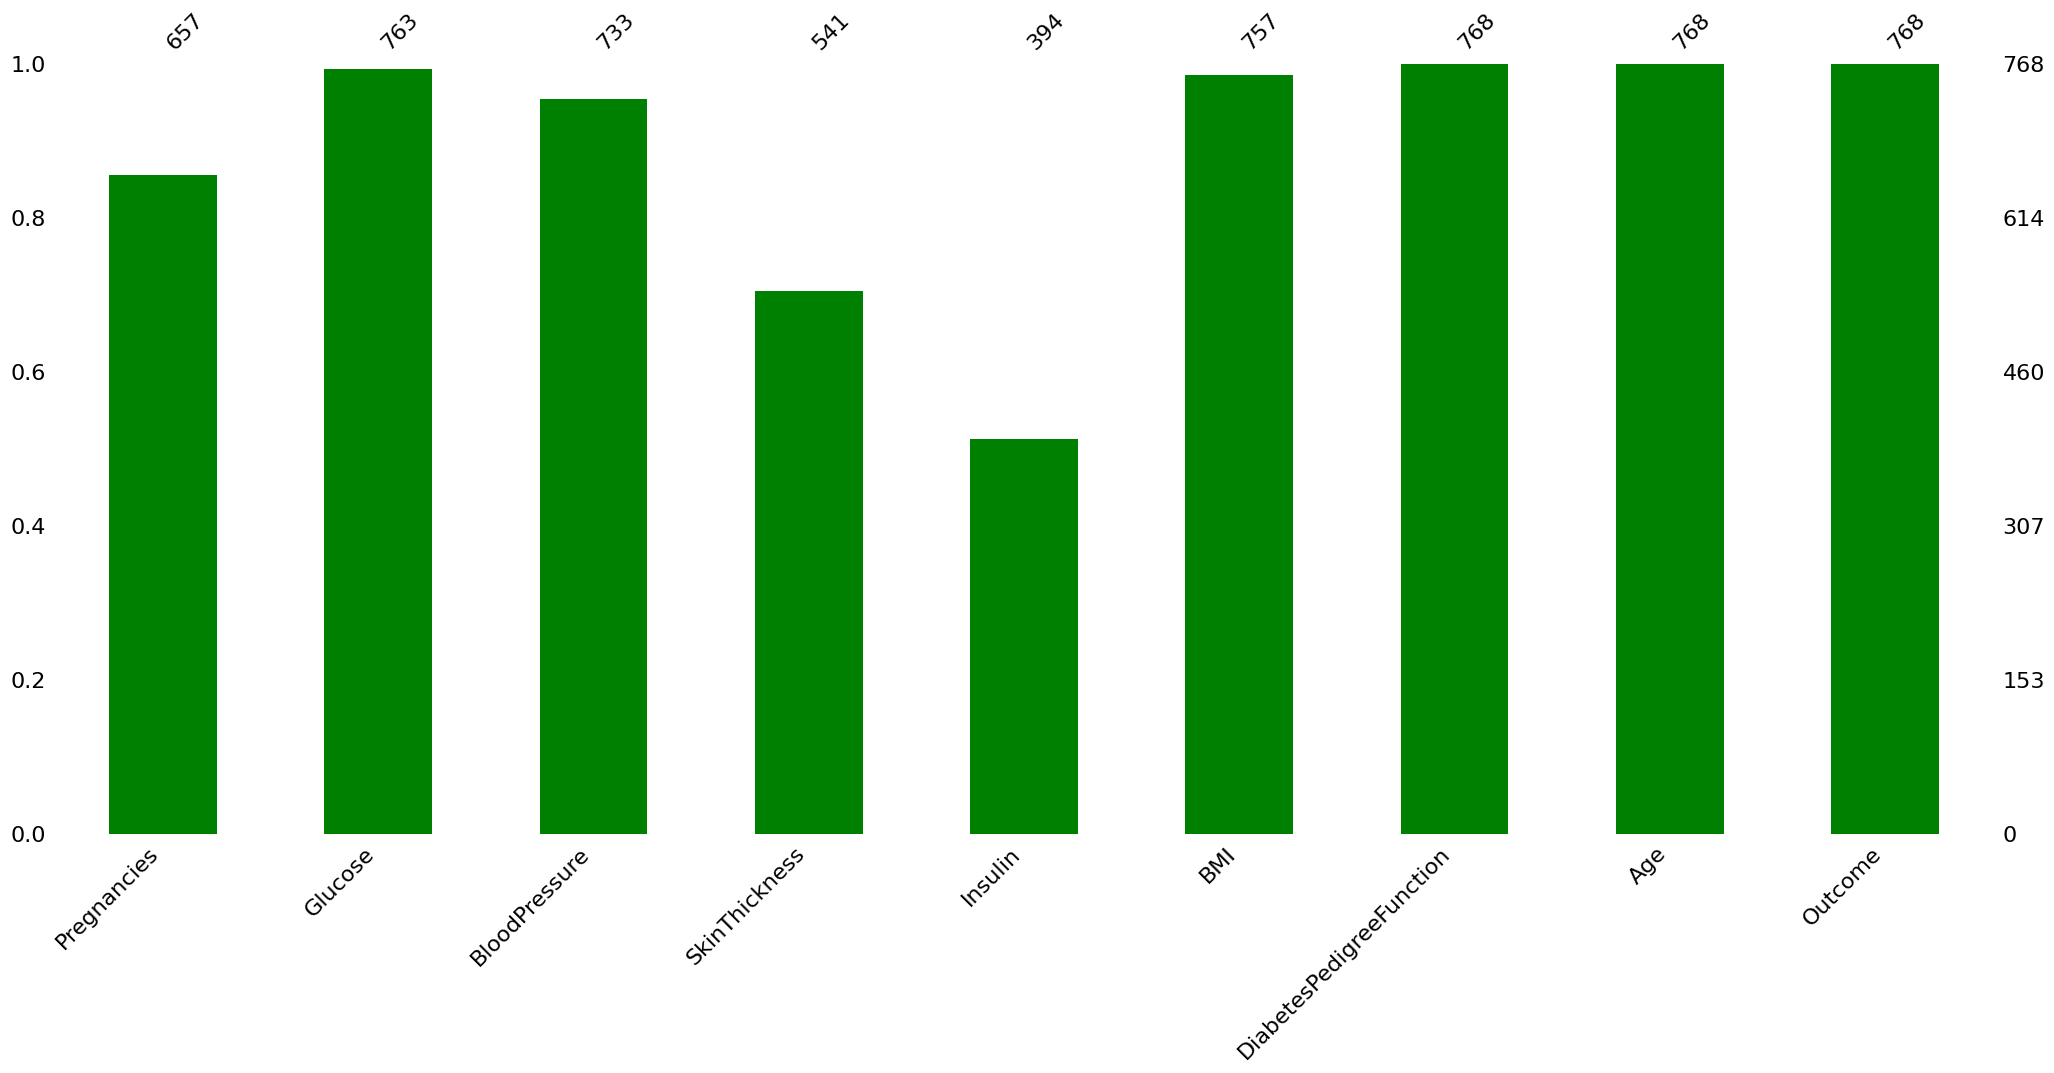

In [ ]:
import missingno as msno
msno.bar(df,color='green')

In [ ]:
def median_target(var):
  temp=df[df[var].notnull()]
  temp=temp[[var,'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
  return temp

In [ ]:
columns=df.columns
columns=columns.drop('Outcome')

for i in columns:
  median_target(i)
  df.loc[(df['Outcome']==0) & (df[i].isnull()),i]=median_target(i)[i][0]
  df.loc[(df['Outcome']==1) & (df[i].isnull()),i]=median_target(i)[i][1]


In [ ]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.5  33.6   
1            1.0     85.0           66.0           29.0    102.5  26.6   
2            8.0    183.0           64.0           32.0    169.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            5.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    102.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           32.0    169.5  30.1   
767          1.0     93.0           70.0           31.0    102.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

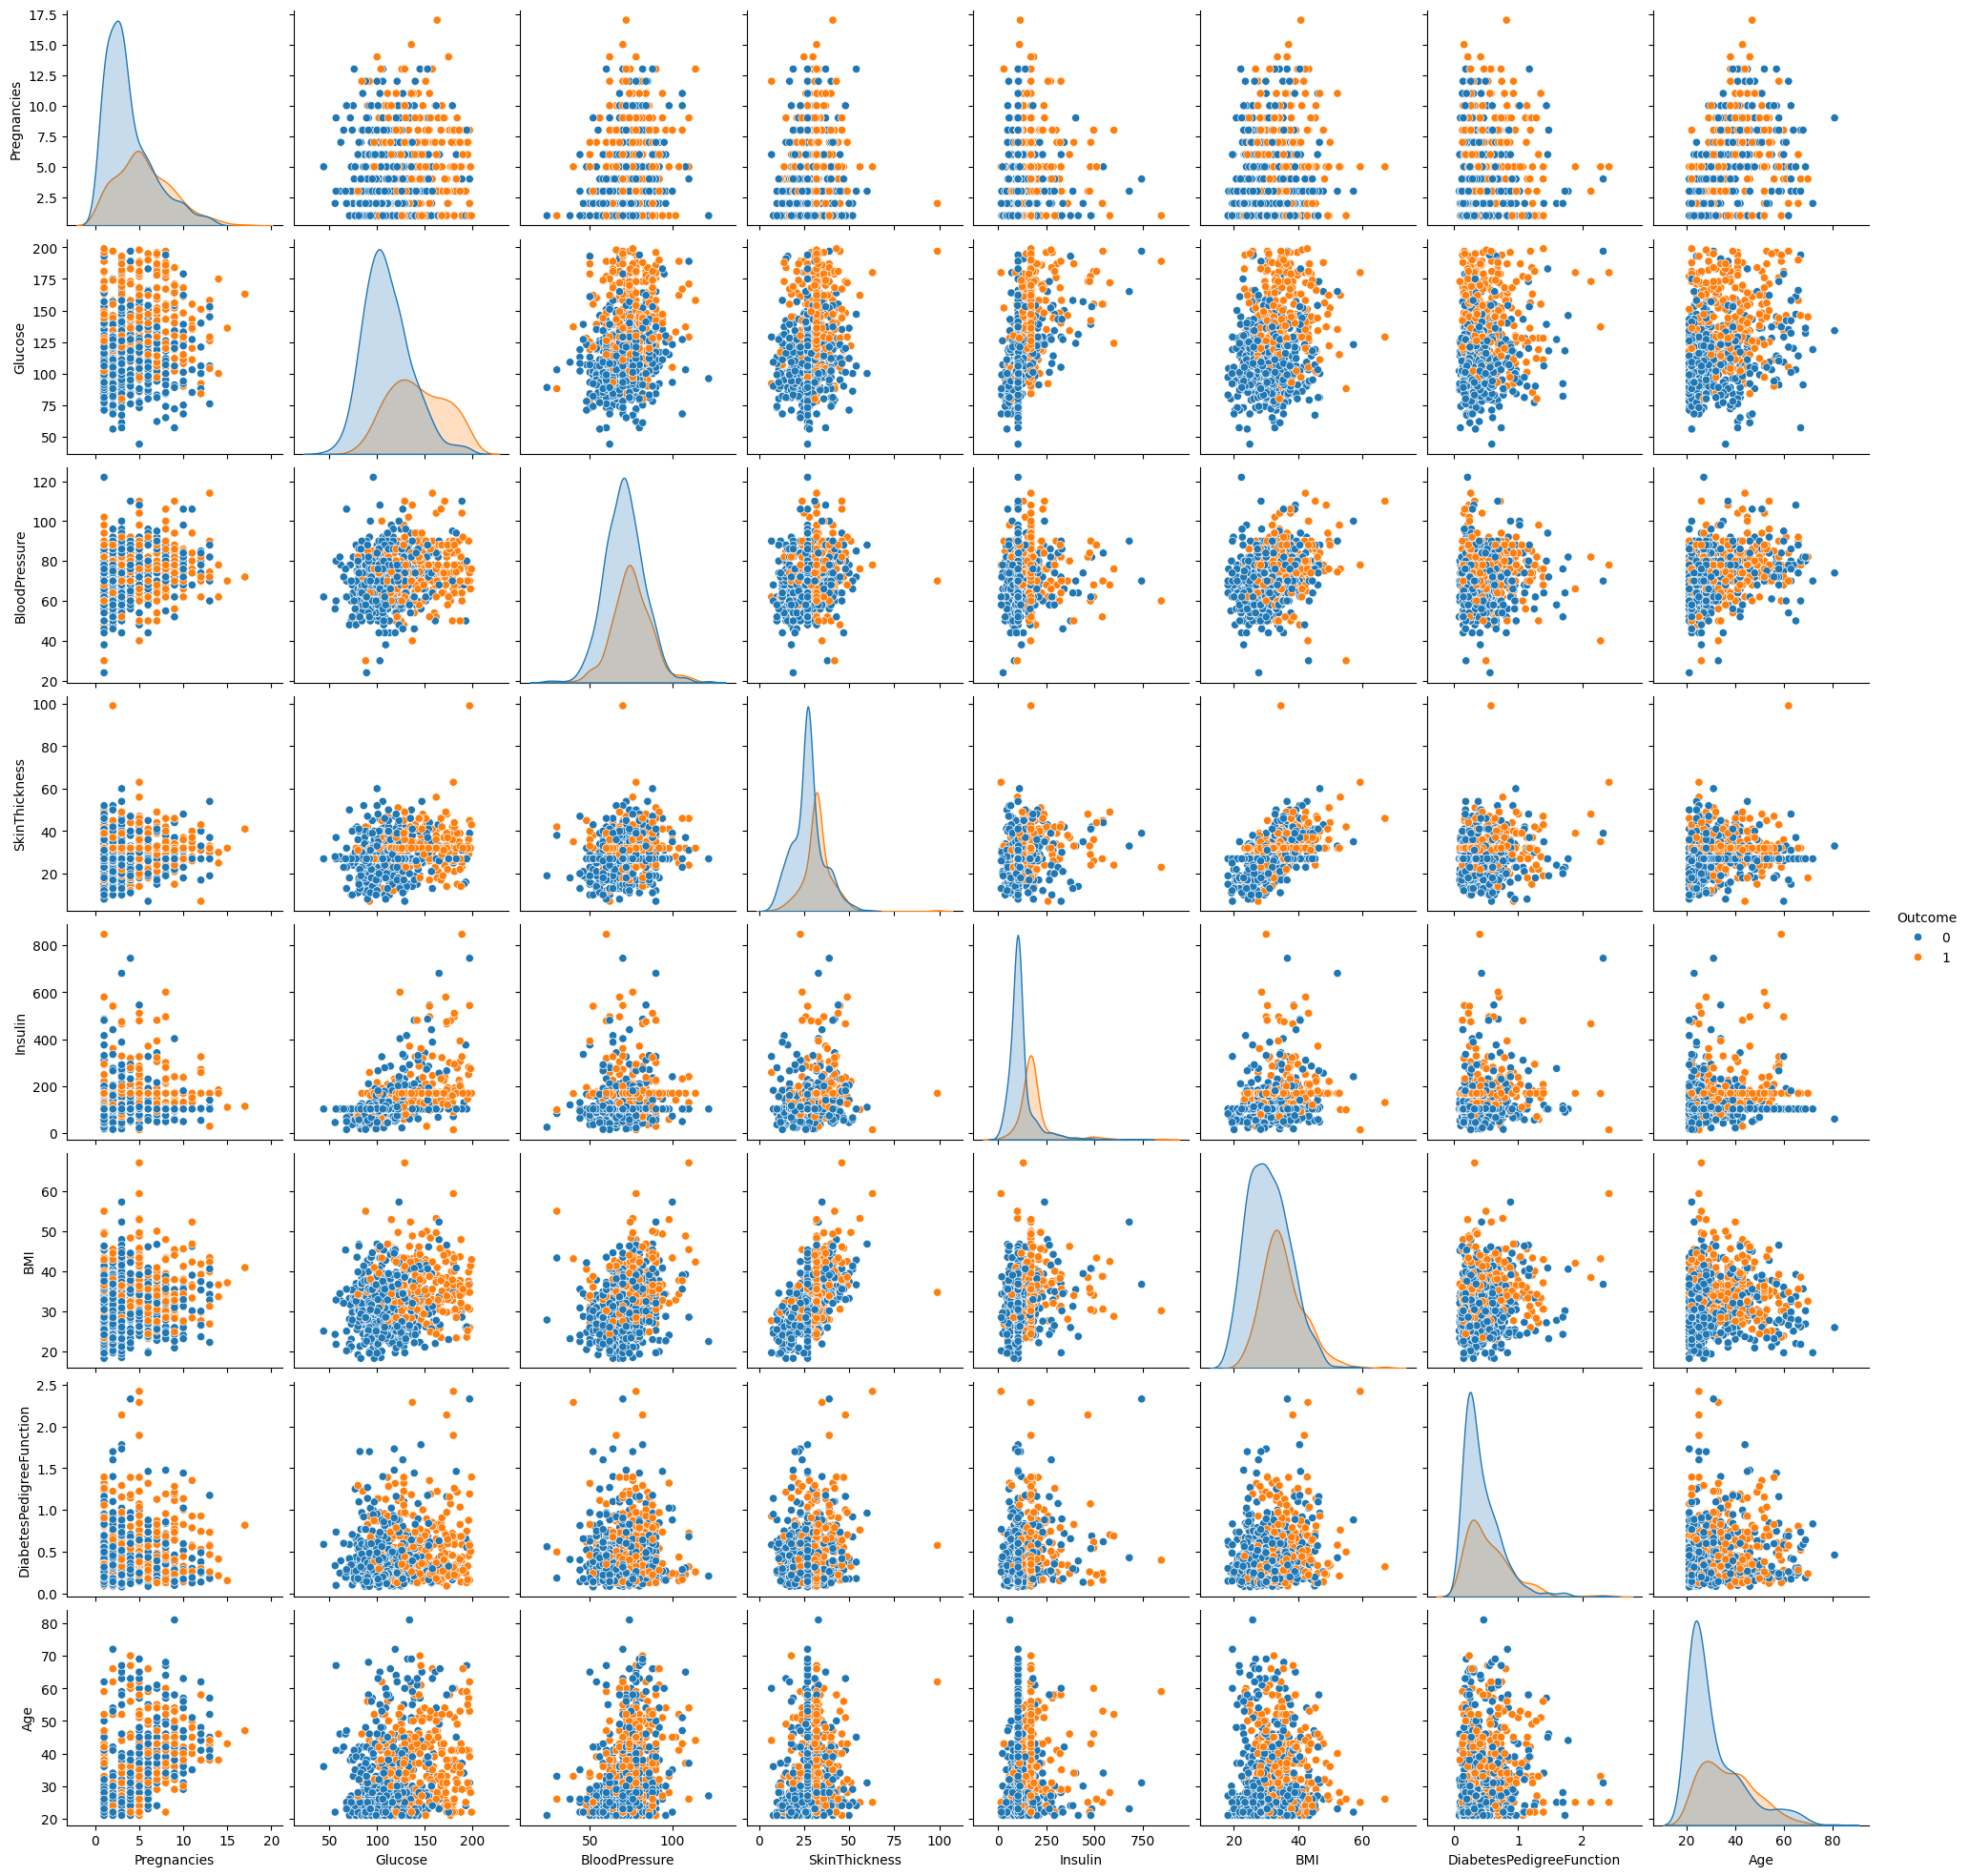

In [ ]:
sns.pairplot(df,hue='Outcome')

<Axes: ylabel='Age'>

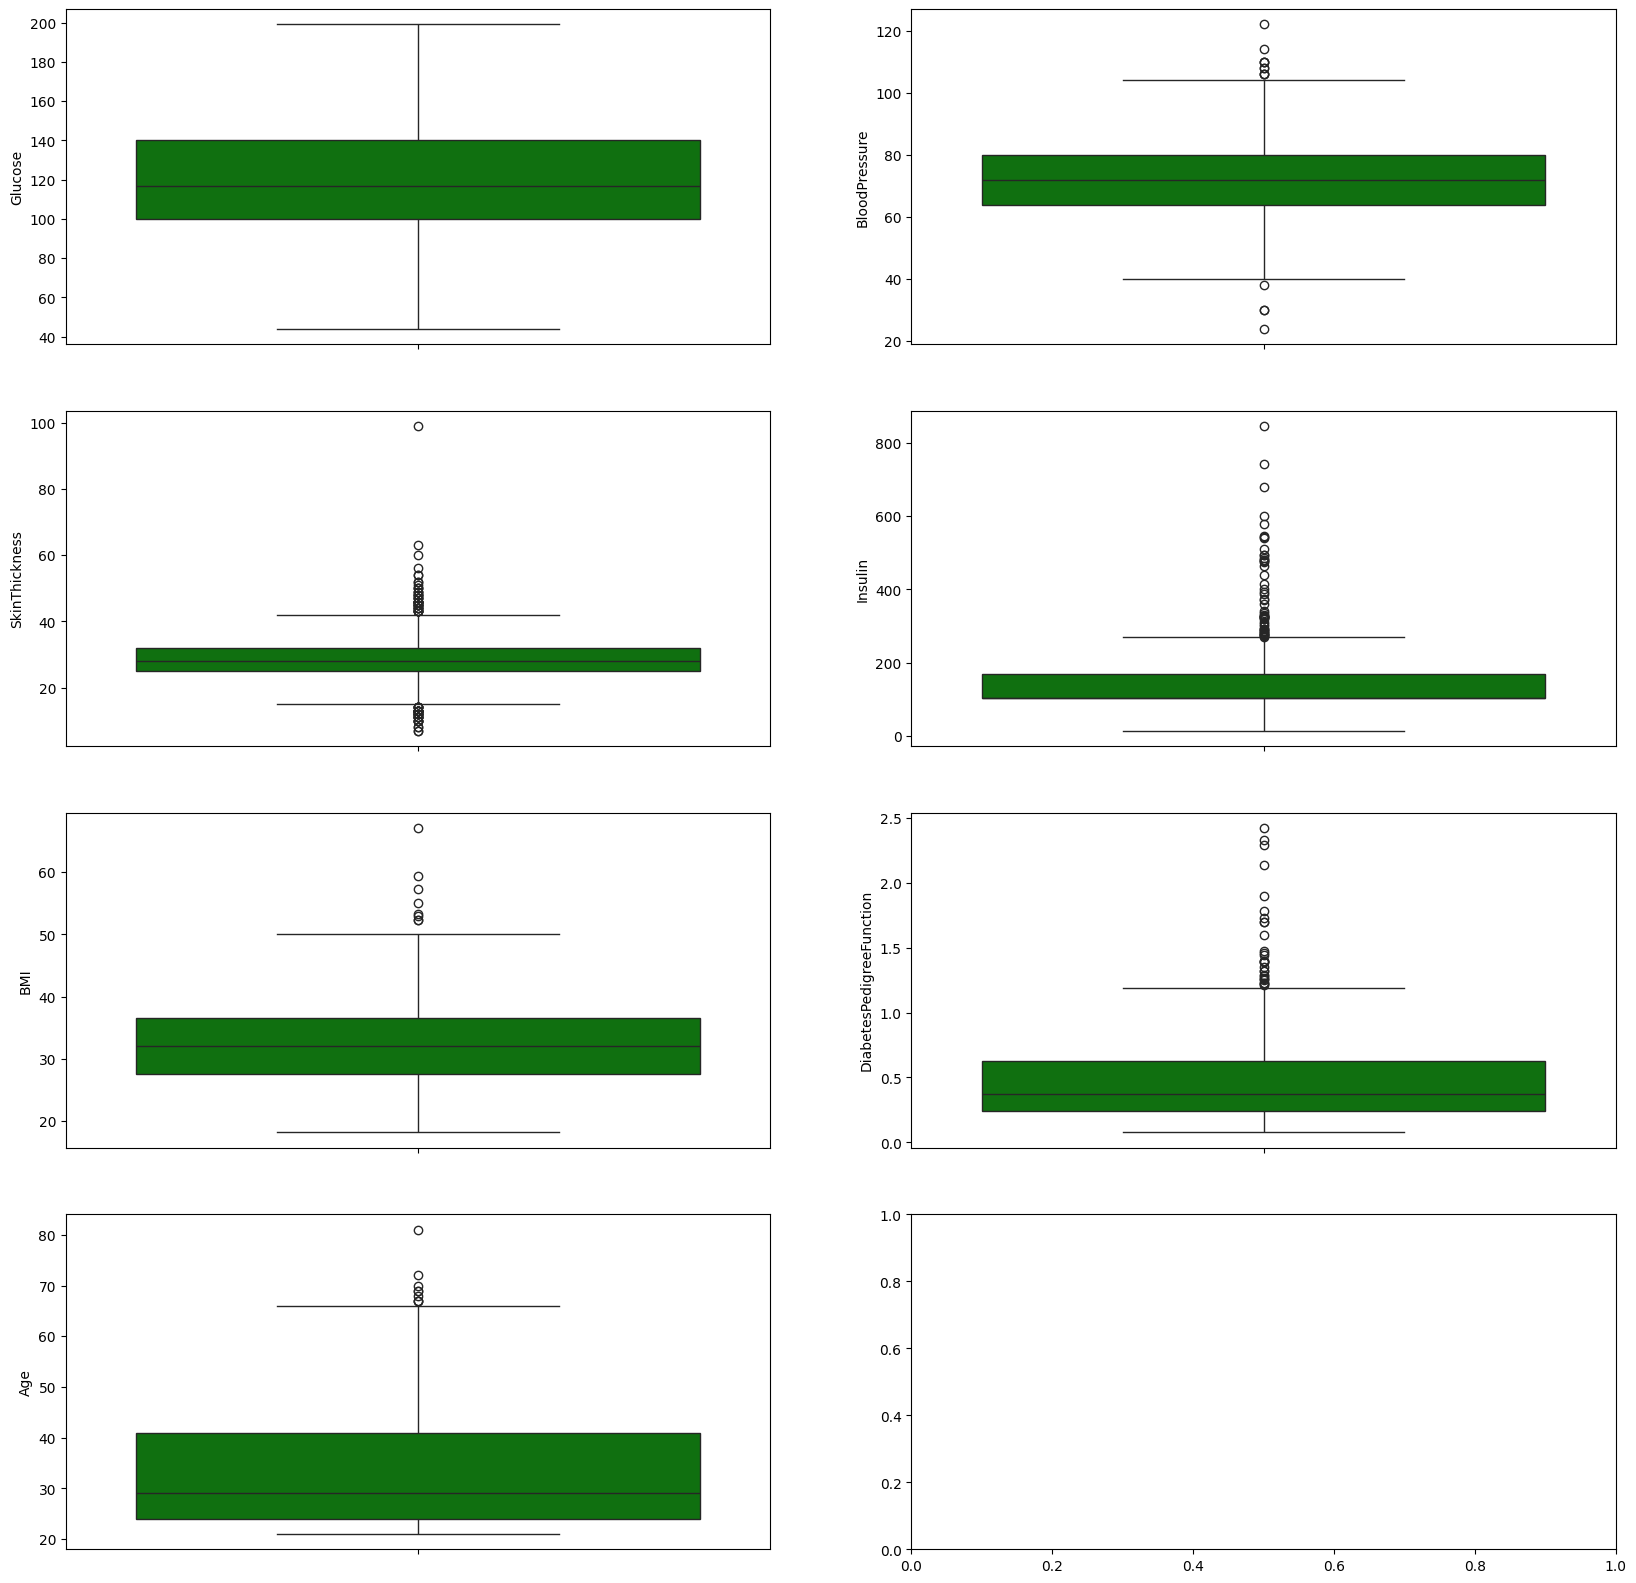

In [ ]:

fig,ax=plt.subplots(4,2,figsize=(20,20))
sns.boxplot(df.Glucose,ax=ax[0,0],color='green')
sns.boxplot(df.BloodPressure,ax=ax[0,1],color='green')
sns.boxplot(df.SkinThickness,ax=ax[1,0],color='green')
sns.boxplot(df.Insulin,ax=ax[1,1],color='green')
sns.boxplot(df.BMI,ax=ax[2,0],color='green')
sns.boxplot(df.DiabetesPedigreeFunction,ax=ax[2,1],color='green')
sns.boxplot(df.Age,ax=ax[3,0],color='green')

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [ ]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.5  33.6   
1            1.0     85.0           66.0           29.0    102.5  26.6   
2            8.0    183.0           64.0           32.0    169.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            5.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    102.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           32.0    169.5  30.1   
767          1.0     93.0           70.0           31.0    102.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [ ]:
df_scores=lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.30540654, -3.06509976, -2.48947632, -2.38250393, -2.15557018,
       -2.11501347, -2.08356175, -2.01128734, -1.95386655, -1.83559384,
       -1.74974237, -1.7330214 , -1.71017168, -1.70215105, -1.68722889,
       -1.64294601, -1.64180205, -1.61181746, -1.61067772, -1.60925053])

In [ ]:
df.shape

(768, 9)

In [ ]:
threshold=np.sort(df_scores)[8]
threshold

-1.9538665533171866

In [ ]:
outlier=df_scores>threshold

In [ ]:
df=df[outlier]

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.shape

(759, 9)

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [ ]:
columns=x.columns
indexes=x.index

In [ ]:
from sklearn.preprocessing import RobustScaler
r_scaler=RobustScaler()
x=r_scaler.fit_transform(x)
x=pd.DataFrame(x,columns=columns,index=indexes)

In [ ]:
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         0.75    0.775          0.000       1.000000  1.000000  0.177778   
1        -0.50   -0.800         -0.375       0.142857  0.000000 -0.600000   
2         1.25    1.650         -0.500       0.571429  1.000000 -0.966667   
3        -0.50   -0.700         -0.375      -0.714286 -0.126866 -0.433333   
4         0.50    0.500         -2.000       1.000000  0.977612  1.233333   

   DiabetesPedigreeFunction       Age  
0                  0.673602  1.235294  
1                 -0.044213  0.117647  
2                  0.790637  0.176471  
3                 -0.522757 -0.470588  
4                  4.993498  0.235294

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Logistic Regression

In [ ]:
# from sklearn.linear_model import LogesticRegression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)


LogisticRegression()

In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac_score_lgr=accuracy_score(y_test,y_pred)
ac_score_lgr

0.8092105263157895

In [ ]:
confusion_matrix(y_test,y_pred)

array([[86, 10],
       [19, 37]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        96
           1       0.79      0.66      0.72        56

    accuracy                           0.81       152
   macro avg       0.80      0.78      0.79       152
weighted avg       0.81      0.81      0.81       152



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
knn.score(x_train,y_train),knn.score(x_test,y_test)

(0.8830313014827018, 0.8881578947368421)

In [ ]:
ac_score_rsearch_knn=accuracy_score(y_test,y_pred)
ac_score_rsearch_knn

0.8881578947368421

**Using Hypertunung**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
random_search=RandomizedSearchCV(knn,param_distributions=param_grid,cv=5)

In [ ]:
  random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 5, 7, 9],
                                        'weights': ['uniform', 'distance']})

In [ ]:
random_search.score(x_train,y_train),random_search.score(x_test,y_test)

(0.8945634266886326, 0.8947368421052632)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtc.score(x_train,y_train),dtc.score(x_test,y_test)

(1.0, 0.8947368421052632)

**model is overfitting**

**Using Hyperparameter tuning**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']}

In [ ]:
random_search=RandomizedSearchCV(dtc,param_distributions=param_grid)

In [ ]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]})

In [ ]:
random_search.score(x_train,y_train),random_search.score(x_test,y_test)

(0.957166392092257, 0.9013157894736842)

In [ ]:
y_pred=random_search.predict(x_test)

In [ ]:
ac_score_rsearch_dt=accuracy_score(y_test,y_pred)
ac_score_rsearch_dt

0.9013157894736842

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rfc.score(x_train,y_train)

1.0

**Model is Overfitting**

**Using hyperparameter Tuning**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [ ]:
random_search=RandomizedSearchCV(rfc,param_distributions=param_grid,cv=5)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]})

In [ ]:
random_search.score(x_train,y_train),random_search.score(x_test,y_test)

(0.9884678747940692, 0.9473684210526315)

In [ ]:
y_pred=random_search.predict(x_test)

In [ ]:
ac_score_rsearch_rfc=accuracy_score(y_test,y_pred)
ac_score_rsearch_rfc

0.9473684210526315

In [ ]:
data = {
    'models': ['Logistic_regression', 'KNN', 'DecisionTree_random_search', 'Random_Forest_random_search'],
    'score': [ac_score_lgr, ac_score_rsearch_knn, ac_score_rsearch_dt, ac_score_rsearch_rfc]
}

In [ ]:
scores=pd.DataFrame(data)

In [ ]:
scores

models     score
0          Logistic_regression  0.809211
1                          KNN  0.888158
2   DecisionTree_random_search  0.947368
3  Random_Forest_random_search  0.947368